In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# nltk - natural language tool kit
# To read word in english
import nltk
from nltk.corpus import stopwords
import string

In [2]:
data=pd.read_csv('C:/Users/Tirth/Desktop/Machine_learning/machine learning/my codes/Email Check.csv')

In [3]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
data.drop(["Unnamed: 0" , 'label_num'] , axis = 1 , inplace = True)

In [5]:
data.shape

(5171, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
label    5171 non-null object
text     5171 non-null object
dtypes: object(2)
memory usage: 80.9+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['label']=encoder.fit_transform(data['label'])

In [8]:
data.head()

,label,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [9]:
# Drop Duplicate rows
data.drop_duplicates(inplace = True)

In [10]:
data.shape

(4993, 2)

In [11]:
# Download stopword package
nltk.download('stopwords')

[nltk_data] Error loading stopwords: HTTP Error 502: Gateway Error


False

In [12]:
def process_text(text):
    # remove punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # remove stopwords
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    return clean_words

In [13]:
# Tokenised words
data['text'].head().apply(process_text)

0    [Subject, enron, methanol, meter, 988291, foll...
1    [Subject, hpl, nom, january, 9, 2001, see, att...
2    [Subject, neon, retreat, ho, ho, ho, around, w...
3    [Subject, photoshop, windows, office, cheap, m...
4    [Subject, indian, springs, deal, book, teco, p...
Name: text, dtype: object

In [14]:
# Stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
# Convert collection of text into matrix of tokens
from sklearn.feature_extraction.text import CountVectorizer
mat = CountVectorizer(analyzer = process_text).fit_transform(data['text'])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mat , data['label'] , test_size=0.2, random_state=11)

In [17]:
mat.shape

(4993, 50381)

In [18]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train , y_train)

In [19]:
y_pred = model.predict(X_test)

In [20]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9819819819819819

In [21]:
# pd.crosstab(y_test , y_pred , rownames = ['Actual Type'] , colnames = ['Predict Type'])
print('Confusion Matrix: \n' , metrics.confusion_matrix(y_test , y_pred))

Confusion Matrix: 
 [[687  10]
 [  8 294]]


In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train , y_train)

C:\Users\Tirth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n' , metrics.confusion_matrix(y_test , y_pred))

0.977977977977978
Confusion Matrix: 
 [[681  16]
 [  6 296]]


In [24]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier().fit(X_train , y_train)

In [25]:
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n' , metrics.confusion_matrix(y_test , y_pred))

0.8108108108108109
Confusion Matrix: 
 [[517 180]
 [  9 293]]


In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs = 2 , random_state = 0).fit(X_train , y_train)

C:\Users\Tirth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n' , metrics.confusion_matrix(y_test , y_pred))

0.953953953953954
Confusion Matrix: 
 [[680  17]
 [ 29 273]]


In [38]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [39]:
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n' , metrics.confusion_matrix(y_test , y_pred))

0.94994994994995
Confusion Matrix: 
 [[672  25]
 [ 25 277]]


[Text(780.8793103448276, 540.7085106382979, 'X[18720] <= 0.5\ngini = 0.412\nsamples = 3994\nvalue = [2834, 1160]'),
 Text(775.1781609195402, 534.9255319148937, 'X[24565] <= 0.5\ngini = 0.482\nsamples = 2867\nvalue = [1707, 1160]'),
 Text(724.7586206896552, 529.1425531914894, 'X[44817] <= 0.5\ngini = 0.438\nsamples = 2440\nvalue = [1648, 792]'),
 Text(688.0574712643678, 523.3595744680852, 'X[24473] <= 0.5\ngini = 0.485\nsamples = 1841\nvalue = [1080, 761]'),
 Text(682.3563218390805, 517.5765957446808, 'X[31017] <= 0.5\ngini = 0.5\nsamples = 1533\nvalue = [772, 761]'),
 Text(676.6551724137931, 511.79361702127665, 'X[7540] <= 0.5\ngini = 0.494\nsamples = 1376\nvalue = [615, 761]'),
 Text(654.5632183908046, 506.01063829787233, 'X[15235] <= 0.5\ngini = 0.48\nsamples = 1256\nvalue = [502, 754]'),
 Text(648.8620689655172, 500.22765957446813, 'X[1129] <= 0.5\ngini = 0.466\nsamples = 1196\nvalue = [442, 754]'),
 Text(633.183908045977, 494.4446808510638, 'X[33091] <= 0.5\ngini = 0.448\nsamples =

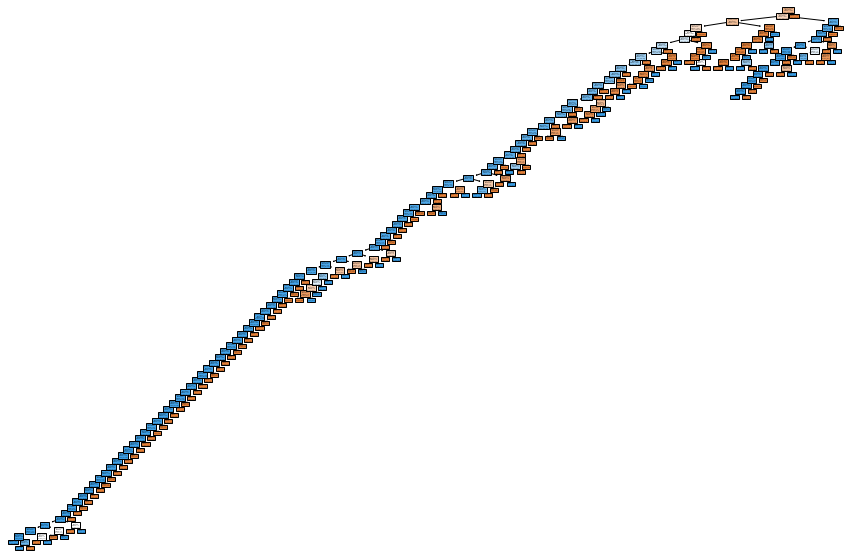

In [40]:
plt.figure(figsize = (15, 10))
tree.plot_tree(model , filled = True)